# 预测序列后一个点值

这个案例是紧跟着上一个案例，只不过这次我们用一个点一个点的方式进行预测

In [1]:
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing import sequence

import numpy as np
import matplotlib.pyplot as plt

## 创建数据

In [2]:
np.random.seed(1024)    # 设置随机种子

x = np.linspace(-10000, 10000, num=500000)
x = np.reshape(x, (5000, 100))
y = np.sin(x) + np.random.randn(5000, 100) * 0.05   # 给 sin(x)增加噪声

因为这次是预测一个点，所以数据集应该是第80个点后面紧跟着的一个点

In [3]:
x_train = y[:, :80].copy()
y_train = y[:, 81].copy()    # 获取第81个点

In [4]:
x_train = np.expand_dims(x_train, axis=-1)    # 需要对数据进行维度扩充

In [5]:
x_train.shape, y_train.shape

((5000, 80, 1), (5000,))

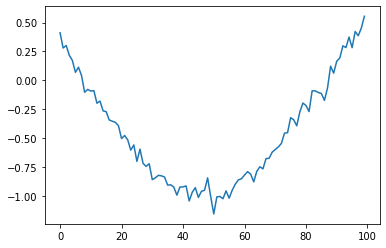

In [6]:
plt.plot(y[0, :])

## 搭建模型

为了和前一个案例进行对比，这里选用相同的模型，只是更改了最后一层的 Dense 维度

In [7]:
def get_inter_layer(x):
    x = LSTM(units=100, return_sequences=True)(x)
    x = LSTM(units=50,  return_sequences=True)(x)
    x = LSTM(units=20,  return_sequences=True)(x)
    return x

In [8]:
input_layer = Input(shape=(80, 1))
inter_layer = get_inter_layer(input_layer)
flatten = Flatten()(inter_layer)
dense_1 = Dense(128)(flatten)
dense_2 = Dense(1)(dense_1)     # 输出一个数

In [9]:
model = Model(inputs=input_layer, outputs=dense_2)

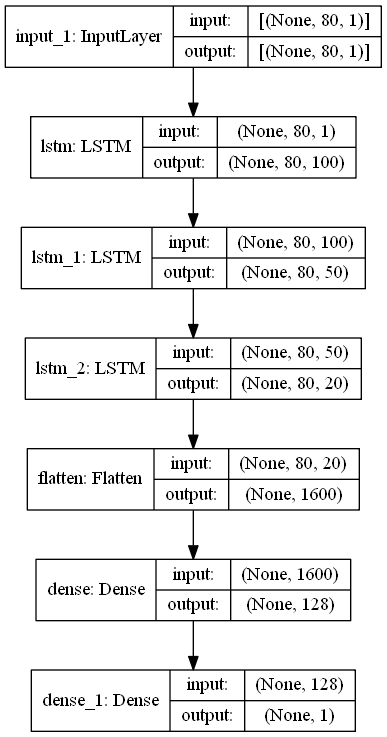

In [10]:
plot_model(model, show_shapes=True)

In [11]:
model.compile(loss='mae', optimizer='rmsprop')

In [12]:
model.fit(x_train.copy(), y_train.copy(), verbose=1, batch_size=128, epochs=5)

Epoch 1/5
40/40 [==============================] - 6s 34ms/step - loss: 0.4807
Epoch 2/5
40/40 [==============================] - 1s 34ms/step - loss: 0.1595
Epoch 3/5
40/40 [==============================] - 1s 34ms/step - loss: 0.1279
Epoch 4/5
40/40 [==============================] - 1s 33ms/step - loss: 0.1049
Epoch 5/5
40/40 [==============================] - 1s 33ms/step - loss: 0.1069


## 预测序列

In [13]:
pred_seq = []

seq_input = np.expand_dims(x_train[0], axis=0)

for i in range(20):
    pred_ans = model.predict(seq_input)
    pred_seq.append(pred_ans)
    seq_input[0, :-1, 0] = seq_input[0, 1:, 0]
    seq_input[0, -1, 0] = pred_ans
    
pred_seq = np.array(pred_seq)